# Exploratory Data Analysis & Visualisation for Tom Tom
**Author: Javed Hassan Sabu**


## Purpose
- Work with 'example.csv' file. To identify what data points that are interesting to scope down the research, through data analysis and visualisaiton. 

## Methodology
- Cleaning and transforming the data to make it suitable for exploration.
- Using Pandas Profiling for comprehensive data exploration.
- Using AutoViz for Data Visualisation.


## Results
Describe and comment the most important results.


## Suggested further research
- Analysing the data with time series can give some interesting insights. 
- Collabration with domain experts to reframe the problem better, will give better generalisations.

# Sections in the notebook
1. Importing Libraries
2. Importing Data and initial Inspection
3. Data Preprocessing
4. Pandas-Profiling (Automated Exploratory Analysis)
5. AutoViz (Automated visualisation with pands)
6. Miscellaneous

# 1. Importing Libraries
Required Python libraries are imported

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Visualizations
import matplotlib as plt
import seaborn as sns

# Magic command for visualisation
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore') # to ignore warrnings

# 2. Importing Data and initial Inspection
Retrieve all the required data for the analysis.
- importing the 'example.csv'file with pandas and adding column names to the dataframe
- the timestamp column and MapMatchingError_m column needs cleaning


In [2]:
df = pd.read_csv('example3.csv', names=['Timestamp', 'Speed_kph','MapMatchingError_m','ProbeSource'])
df.head()

,Timestamp,Speed_kph,MapMatchingError_m,ProbeSource
0,2017.11.15_17:19:56,30.25,10,0
1,2017.11.15_17:17:13,7.66,--,1
2,2017.11.15_17:15:27,32.75,--,2
3,2017.11.15_17:15:21,38.25,14,3
4,2017.11.15_17:13:52,29.38,--,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951938 entries, 0 to 951937
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Timestamp           951938 non-null  object 
 1   Speed_kph           951938 non-null  float64
 2   MapMatchingError_m  951938 non-null  object 
 3   ProbeSource         951938 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 29.1+ MB


In [4]:
df.isnull().sum()

Timestamp             0
Speed_kph             0
MapMatchingError_m    0
ProbeSource           0
dtype: int64

# 3. Data processing
Manipulating and cleaning the data to make it ready for data analysis and visualisation.
- replacing unwanted chracters from timestamp colum.
- converting it into timestamp data.

In [5]:
# Timestamp Columns
df['Timestamp'] = df['Timestamp'].str.replace('.','-')
df['Timestamp'] = df['Timestamp'].str.replace('_', ' ')
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d %H:%M:%S') # making a timeseries format

In [6]:
# MapMatchingError_m column
df['MapMatchingError_m'] = df['MapMatchingError_m'].replace('--',np.nan)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951938 entries, 0 to 951937
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Timestamp           951938 non-null  datetime64[ns]
 1   Speed_kph           951938 non-null  float64       
 2   MapMatchingError_m  444036 non-null  object        
 3   ProbeSource         951938 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 29.1+ MB


# Exploratory Data Analysis

## 4. Pandas Profiling
This library provides comprehensive exploratory analysis for data. That is useful to make decision of what areas to scope down in data analysis.
- Data set has 4 columns, out of which 2 are numeric, 1 is time stamp and categorical repectively.
- There are only 0.2% of duplicate rows, due this data set is of 'High Cardinality'.

Summary of TimeStamp variable
- Time stamp range is [2015-01-01 00:09:58 to 2017-11-15 17:19:56]
- Frequency of year 2017 is higher compared to the previous years. That can be due to various unknown reasons.
- More than 95% of values in the timestamp are unique.

Summary of speed_kph column
- This is a continous variable.
- Speed is in range of [0.02 to 157] and mean(average) speed is 32.8 kph.
- The distribution is skewed left.

Summary of MatchMappingError variable
- This is continous variable.
- The range is between [-31 to 31]
- This data feature has 53% of missing values that are null.

Summary of ProbeScource
- This is a categorical variable as each source has its own number.
- The ProbeSource has distinct values ranging from 0 to 19.
- Most common values are 1,2,4,6.


In [8]:
data = df.copy()
from pandas_profiling import ProfileReport
profile = ProfileReport(data, title = 'Pandas Profiling Report',explorative=True,
                         plot={"dpi": 200, "image_format": "png"},
                       samples=None, correlations=None, missing_diagrams=None, duplicates=None,interactions=None,)
profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/12 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
profile.to_widgets()

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

# Visualisation

## 5. AutoViz Pandas
Correlation
- There is no strong correlation between the features.
- 

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.
Shape of your Data Set: (951938, 4)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0

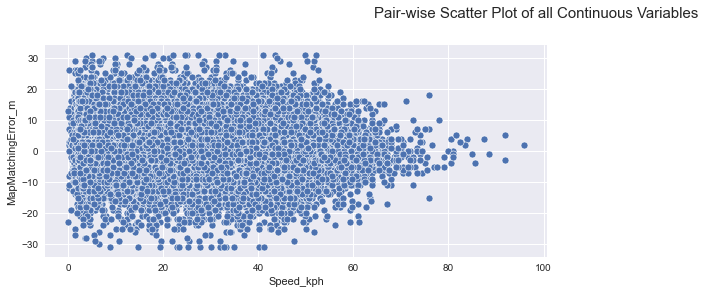

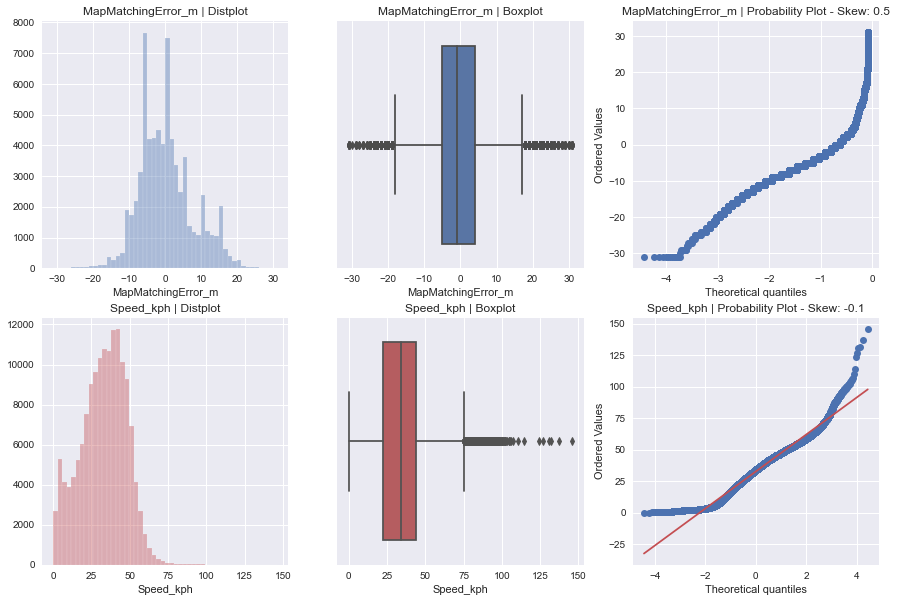

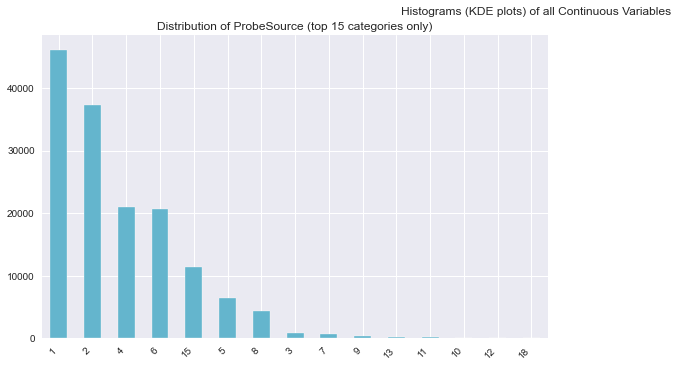

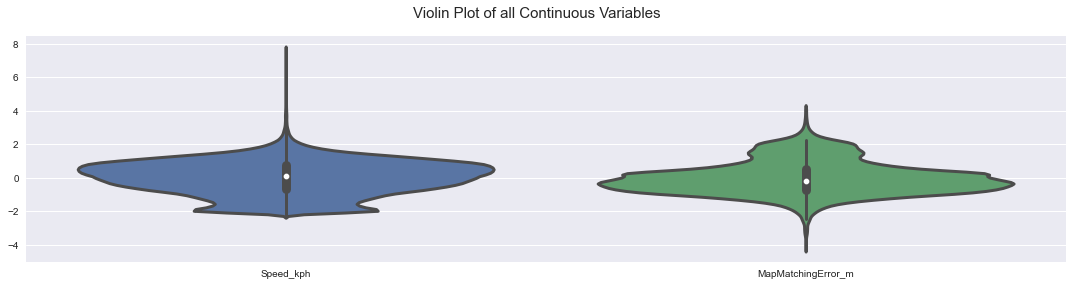

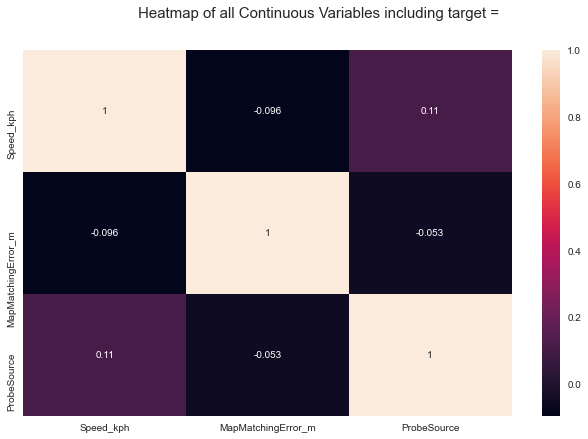

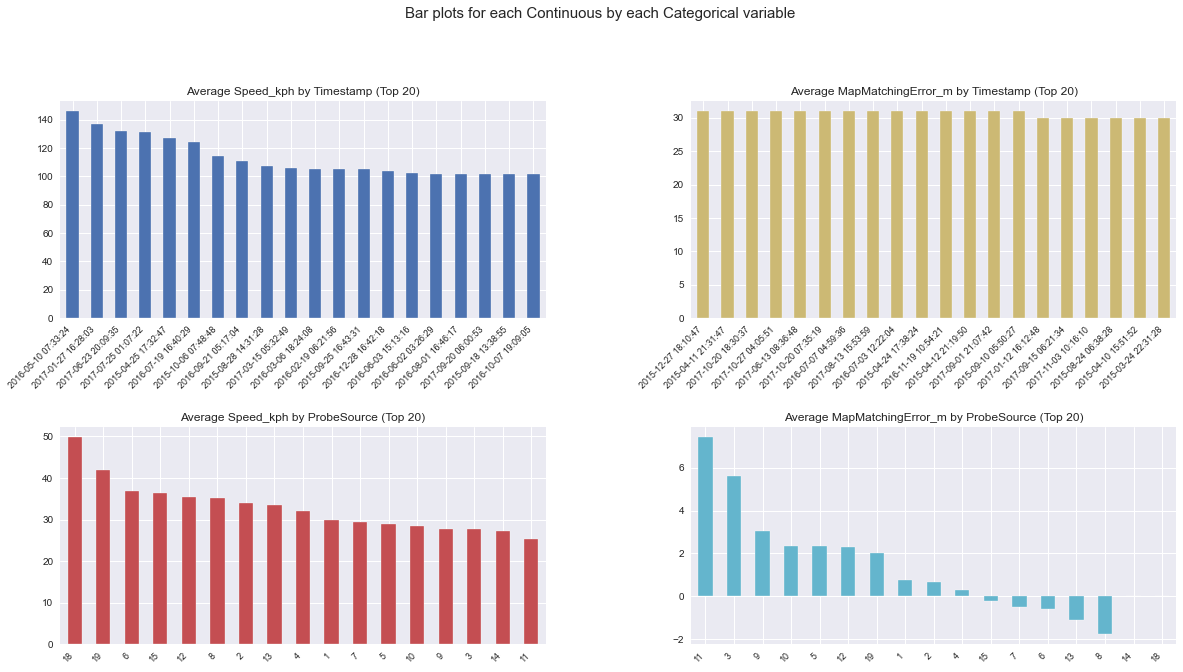

Time to run AutoViz (in seconds) = 14.764

 ###################### VISUALIZATION Completed ########################


In [11]:
df.to_csv('transformed.csv', index=False) # Creating a csv file to use with autoviz
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
filename = "transformed.csv"
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",")

## References
Relevant references used in the notebook are mentioned here:
1. Pandas famous labirary for data manipulation in python https://pandas.pydata.org/
2. Pandas Profiling : for quick data analysis https://github.com/pandas-profiling/pandas-profiling
3. AutoViz : a automated quick cisualisation tool https://towardsdatascience.com/autoviz-automatically-visualize-any-dataset-ba2691a8b55a
4. Map Matching: Map matching denotes a procedure that assigns geographical objects to locations on a digital map. 
Citation: Jensen C., Tradišauskas N. (2009) Map Matching. In: LIU L., ÖZSU M.T. (eds) Encyclopedia of Database Systems. Springer, Boston, MA. https://doi.org/10.1007/978-0-387-39940-9_215
5. Pandas time series: from youtube video https://www.youtube.com/watch?v=r0s4slGHwzE&list=RDCMUCh9nVJoWXmFb7sLApWGcLPQ&start_radio=1&t=45

# Miscellaneous


## Time Series Analysis
Some Insights that can be interesting to look in future
- The varrying of Speed and match mapping error based on the variation of day. Forx example is it weekday or weekend.
- How does the MatchMapping error value changes with variation of months, such as winter, spring, summer, autum

In [12]:
time_data = pd.read_csv('transformed.csv', index_col=['Timestamp'], parse_dates=['Timestamp'])